## Estimation de densité de probabilité non paramétrique

La bibliothèque de Machine Learning scikit-learn fournit la classe KernelDensity qui met en œuvre l'estimation de la densité du noyau. Tout d'abord, la classe est construite avec les arguments de largeur de bande (taille de la fenêtre) et de noyau (fonction de base) souhaités. C'est une bonne idée de tester différentes configurations sur vos données. Dans ce cas, nous allons essayer une largeur de bande de 2 et un noyau gaussien. La classe est alors ajustée sur un échantillon de données via la fonction fit( ). La fonction s'attend à ce que les données aient une forme 2D avec la forme [lignes, colonnes], nous pouvons donc remodeler notre échantillon de données pour avoir 1 000 lignes et 1 colonne.

Exemple d'estimation de la densité du noyau pour un échantillon de données bimodal

In [142]:
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from numpy import asarray
from numpy import exp
from sklearn.neighbors import KernelDensity

Générer un échantillon

In [143]:
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

Densité d'ajustement

In [144]:
model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)

KernelDensity(bandwidth=2)

Probabilités d'échantillonnage pour une série de résultats

In [145]:
values = asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = exp(probabilities)

Tracer l'histogramme et le pdf

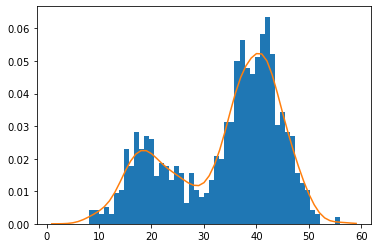

In [146]:
pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values[:], probabilities)
pyplot.show()